In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df['conversion'] = df['y'].apply(lambda x:1 if x == 'yes' else 0)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


1. Aggregate Conversion Rate

In [7]:
# total number of conversions
print(df.conversion.sum())

# total number of clients in the data
print(df.shape[0])

4640
41188


In [8]:
print('total conversions: {} out of {}'.format(df.conversion.sum(), df.shape[0]))

total conversions: 4640 out of 41188


In [9]:
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

conversion rate: 11.27%


### Conversion rate by Age

In [12]:
conversions_by_age = df.groupby(by='age')['conversion'].sum() / df.groupby(by='age')['conversion'].count() * 100.0

In [13]:
conversions_by_age

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: conversion, Length: 78, dtype: float64

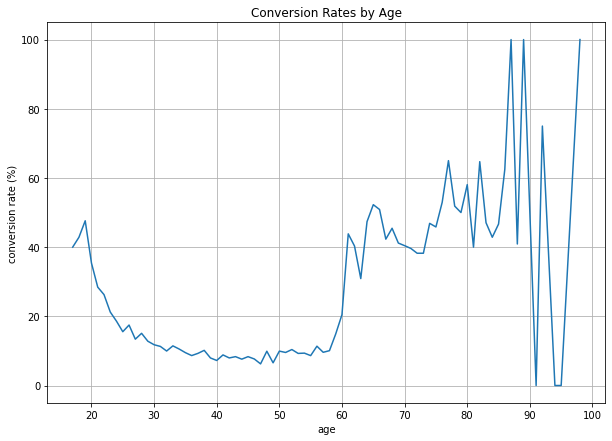

In [16]:
ax = conversions_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [17]:
df['age_group'] = df['age'].apply(
    lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

In [18]:
conversions_by_age_group = df.groupby(
    by='age_group')['conversion'].sum() / df.groupby(
    by='age_group')['conversion'].count() * 100.0

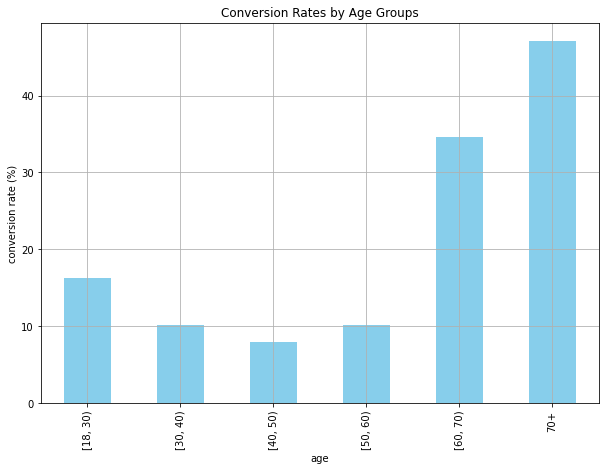

In [19]:
ax = conversions_by_age_group.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

### Conversions versus Non-conversions

In [22]:
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


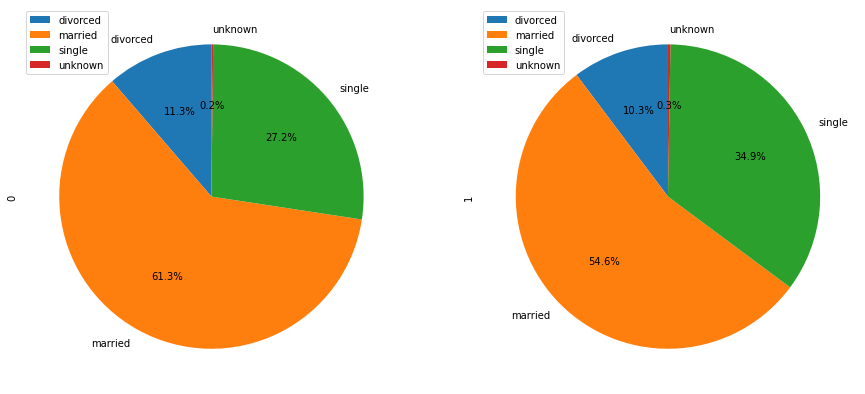

In [23]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

### Conversion by age and marital status

In [24]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)

age_marital_df = age_marital_df.divide(
    df.groupby(
        by='age_group'
    )['conversion'].count(), 
    axis=0
)

In [25]:
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


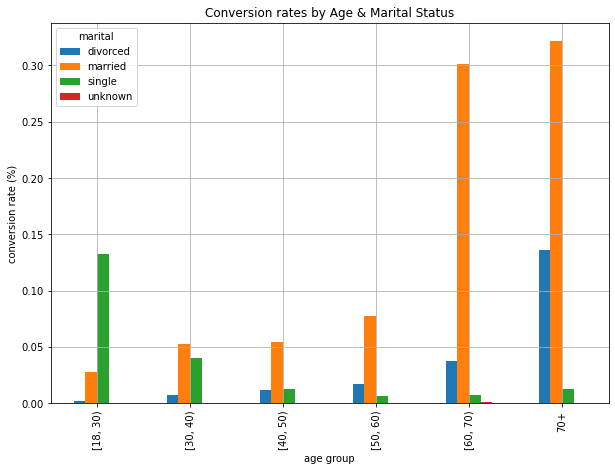

In [26]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

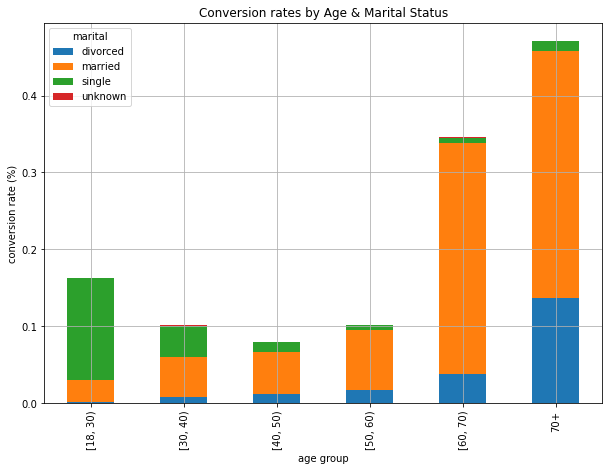

In [27]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()